# CS188 Project 2 - Binary Classification Comparative Methods

For this project we're going to attempt a binary classification of a dataset using multiple methods and compare results. 

Our goals for this project will be to introduce you to several of the most common classification techniques, how to perform them and tweek parameters to optimize outcomes, how to produce and interpret results, and compare performance. You will be asked to analyze your findings and provide explanations for observed performance. 

Specifically you will be asked to classify whether a <b>patient is suffering from heart disease</b> based on a host of potential medical factors.

<b><u>DEFINITIONS</b></u>


<b> Binary Classification:</b>
In this case a complex dataset has an added 'target' label with one of two options. Your learning algorithm will try to assign one of these labels to the data.

<b> Supervised Learning:</b>
This data is fully supervised, which means it's been fully labeled and we can trust the veracity of the labeling.

## Background: The Dataset 

For this exercise we will be using a subset of the UCI Heart Disease dataset, leveraging the fourteen most commonly used attributes. All identifying information about the patient has been scrubbed. 

The dataset includes 14 columns. The information provided by each column is as follows:
<ul>
    <li><b>age:</b> Age in years</li>
    <li><b>sex:</b> (1 = male; 0 = female)</li>
    <li><b>cp:</b> Chest pain type (0 = asymptomatic; 1 = atypical angina; 2 = non-anginal pain; 3 = typical angina)</li>
    <li><b>trestbps:</b> Resting blood pressure (in mm Hg on admission to the hospital)</li>
    <li><b>cholserum:</b> Cholestoral in mg/dl</li>
    <li><b>fbs</b> Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)</li>
    <li><b>restecg:</b> Resting electrocardiographic results (0= showing probable or definite left ventricular hypertrophy by Estes' criteria; 1 = normal; 2 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV))</li>
    <li><b>thalach:</b> Maximum heart rate achieved</li>
    <li><b>exang:</b> Exercise induced angina (1 = yes; 0 = no)</li>
    <li><b>oldpeakST:</b> Depression induced by exercise relative to rest</li>
    <li><b>slope:</b> The slope of the peak exercise ST segment (0 = downsloping; 1 = flat; 2 = upsloping)</li>
    <li><b>ca:</b> Number of major vessels (0-3) <b>not</b> colored by flourosopy</li>
    <li><b>thal:</b> 1 = normal; 2 = fixed defect; 7 = reversable defect</li>
    <li><b><u>Sick:</u></b> Indicates the presence of Heart disease (True = Disease; False = No disease)</li>
</ul>
    


## Loading Essentials and Helper Functions 

In [1]:
#Here are a set of libraries we imported to complete this assignment. 
#Feel free to use these or equivalent libraries for your implementation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import os
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC  
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import sklearn.metrics.cluster as smc
from sklearn.model_selection import KFold


from matplotlib import pyplot
import itertools

%matplotlib inline
import random 
  
random.seed(42) 

In [2]:
# Helper function allowing you to export a graph
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
# Helper function that allows you to draw nicely formatted confusion matrices
def draw_confusion_matrix(y, yhat, classes):
    '''
        Draws a confusion matrix for the given target and predictions
        Adapted from scikit-learn and discussion example.
    '''
    plt.cla()
    plt.clf()
    matrix = confusion_matrix(y, yhat)
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    num_classes = len(classes)
    plt.xticks(np.arange(num_classes), classes, rotation=90)
    plt.yticks(np.arange(num_classes), classes)
    
    fmt = 'd'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

## [20 Points] Part 1. Load the Data and Analyze

Let's first load our dataset so we'll be able to work with it. (correct the relative path if your notebook is in a different directory than the csv file.)

In [4]:
CSV_PATH = "heartdisease.csv"
data = pd.read_csv(CSV_PATH)

### Question 1.1 Now that our data is loaded, let's take a closer look at the dataset we're working with. Use the head method to display some of the rows so we can visualize the types of data fields we'll be working with, then use the describe method, along with any additional methods you'd like to call to better help you understand what you're working with and what issues you might face. 

In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,False
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,False
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,False
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,False
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,False


In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
sick        303 non-null bool
dtypes: bool(1), float64(1), int64(12)
memory usage: 31.2 KB


### Question 1.2 Discuss your data preprocessing strategy. Are their any datafield types that are problematic and why? Will there be any null values you will have to impute and how do you intend to do so? Finally, for your numeric and categorical features, what if any, additional preprocessing steps will you take on those data elements?

- No data fields appear to be problematic.
- From data.info(), it seems that there are no null values in any of the columns. Thus imputing data will not be necessary.
- Numerical features include "age", "trestbps", "chol", "ca", "thalach", and "oldpeak". I plan to preprocess these with a StandardScaler.
- Categorical features include "sex", "cp", "fbs", "restecg", "exang", "slope", and "thal". I plan to OneHotEncode all of these except "exang" and "fbs", which are binary data representing the presence of a value, and so are already one-hot encoded in a sense.

### Question 1.3  Before we begin our analysis we need to fix the field(s) that will be problematic. Specifically convert our boolean sick variable into a binary numeric target variable (values of either '0' or '1'), and then drop the original sick datafield from the dataframe.

In [8]:
data.sick = data.sick.astype(int)

### Question 1.4 Now that we have a feel for the data-types for each of the variables, plot histograms of each field and attempt to ascertain how each variable performs (is it a binary, or limited selection, or does it follow a gradient? (Note: No need to describe each variable, but pick out a few you wish to highlight)

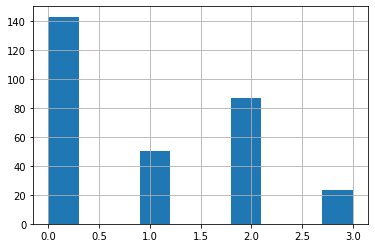

In [9]:
data.cp.hist()

**cp** is limited selection (4 types, as described in Background section).

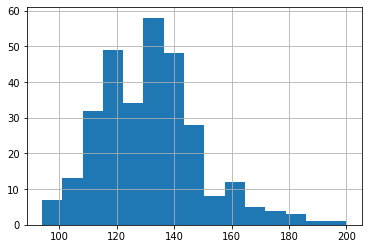

In [10]:
data.trestbps.hist(bins=15)

**trestbps** is a gradient.

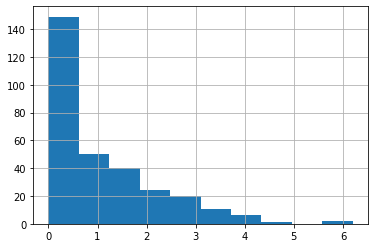

In [11]:
data.oldpeak.hist()

**oldpeak** is a gradient.

### Question 1.5 We also want to make sure we are dealing with a balanced dataset. In this case, we want to confirm whether or not we have an equitable number of  sick and healthy individuals to ensure that our classifier will have a sufficiently balanced dataset to adequately classify the two. Plot a histogram specifically of the sick target, and conduct a count of the number of sick and healthy individuals and report on the results: 

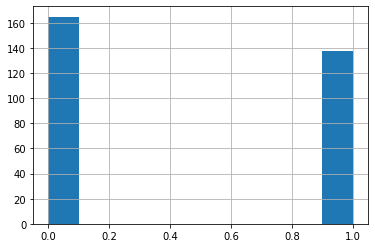

In [12]:
data.sick.hist()

In [13]:
data.sick.value_counts()

0    165
1    138
Name: sick, dtype: int64

There are 165 healthy individuals (sick=0) and 138 sick individuals (sick=1). This is a 54%/46% split between healthy and sick individuals, which is reasonably equitable.

### Question  1.6 Balanced datasets are important to ensure that classifiers train adequately and don't overfit, however arbitrary balancing of a dataset might introduce its own issues. Discuss some of the problems that might arise by artificially balancing a dataset.

There are two basic ways to artificially balance a dataset, namely undersampling of the majority class, and oversampling of the minority class. 

The problem with undersampling is that it discards potentially useful information. This could be significant if strong predictors for the majority class occur in low frequencies, for example. 

On the other hand, oversampling makes exact copies of existing minority samples. In a highly skewed dataset with very few instances of the minority compared to the majority class, this might cause overfitting, as the oversampling may not reflect the true distribution of features of the minority class. In cases with an extreme amount of data, oversampling will also increase the learning time.

In general, balancing a dataset could make classification better. However, data on frequencies may be lost or biased, which will create problems for prediction applications.

### Question 1.9 Now that we have our dataframe prepared let's start analyzing our data. For this next question let's look at the correlations of our variables to our target value. First, map out the correlations between the values, and then discuss the relationships you observe. Do some research on the variables to understand why they may relate to the observed corellations. Intuitively, why do you think some variables correlate more highly than others (hint: one possible approach you can use the sns heatmap function to map the corr() method)?

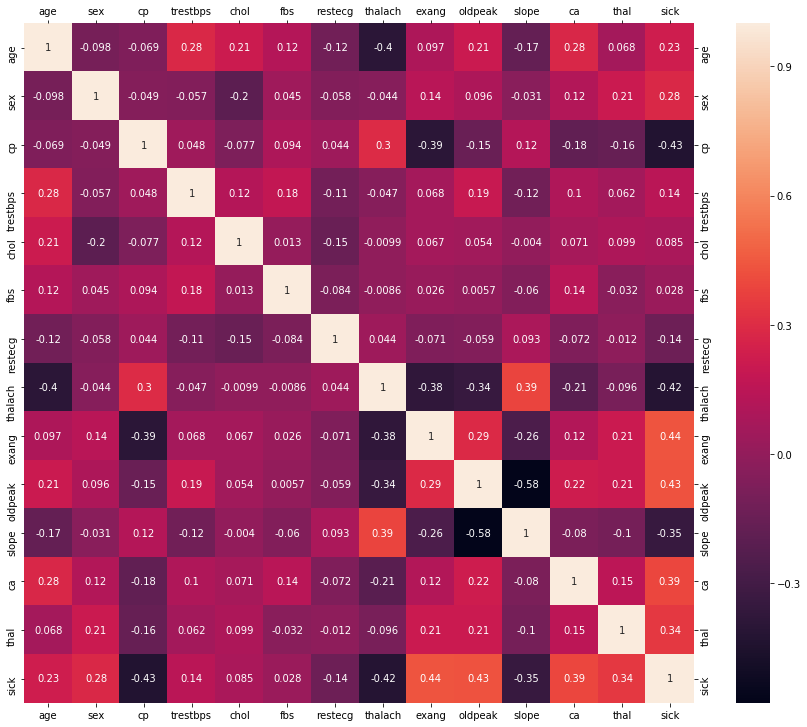

In [14]:
corr = data.corr()
def plot_heatmap(matrix, figsizex, figsizey):
    plt.figure(figsize = (figsizex,figsizey))
    ax = sns.heatmap(matrix, annot=True)
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.tick_params(top=True, labeltop=True, right=True, labelright=True)
    plt.show()
plot_heatmap(corr, 15, 12.5)

Is there a threshold of value for correlation? (e.g. above 0.4 is strong correlation, 0.2 ~ 0.4 is moderate correlation, below 0.2 no correlation)


For our purposes, let's say that correlations with magnitude > 0.35 are strong, those between 0.2-0.35 are moderate, and those < 0.2 are uncorrelated (the correlation is due to chance). Then we have the following list:

- Strongly correlated (> 0.4):
    - thalach vs. age, sick
        - The maximum heart rate (thalach) drops with age as the heart becomes older and less efficient. 
          A less efficient heart may be more at risk of heart disease.       
    - cp vs. sick
        - The categories with higher values are less likely than those with lower values to be related to 
          heart disease - typical angina is chest pain caused by exertion that goes away with rest, and 
          non-anginal pain is chest pain not related to the heart.
    - exang vs. sick
        - Exercise-induced angina may be indicative of a heart heart disease.
    - oldpeak vs. slope, sick
        - ST depression and the slope of the ST segment are inversely relations - a downwards slope will 
          have more depression than a flat or upwards slope.
        - According to wikipedia, ST depression "is often a sign of myocardial ischemia, of which coronary
          insufficiency is a major cause" - i.e. increased ST depression could be a sign of blockage of a
          coronary artery in the heart, which may cause heart attacks.
- Moderately correlated (0.2-0.4):
    - age vs. trestbps, chol, sick, oldpeak
        - Resting blood pressure, cholesterol, and likelihood of heart disease all increase with age.
        - ST depression is indicative of coronary artery blockages, which is more likely to happen as more
          plaque builds up with age.
    - sex vs. chol, thalach, sick
        - Males tend to have higher cholesterol, heartrate, and are more commonly diagnosed with heart disease.
    - cp vs. thalach, exang
        - The categories with higher values tend to be chest pain that is more related to exertion or emotional 
          stress, and thus would correlate with the existence of exercise induced angina/chest pain or stress-
          induced, elevated heartrates.
    - thalach vs. exang, oldpeak, slope
        - A higher maximum heartrate means could lead to more exercise-related chest pain.
        - A higher maximum heartrate could lead to less ST depression and thus a flatter/more upwards slope.
        - A higher maximum heartrate could be the result of more blocked coronary arteries.
    - exang vs. oldpeak, slope
        - A larger ST depression could be related to increased exercise induced angina since it suggests more 
          higher heart exertion during activity. This is the reverse for slope, since ST depression and slope 
          mathematically inverse relations.
    - thal vs. exang, oldpeak, sick
        - Higher-valued categories indicate more serious defects, which would lead to more exercise induced
          angina (heart pain) and a greater likelihood of heart disease. 
        - A greater ST depression means that the heart is under more stress during exercise, which could  
          indicate heart defects.
        - A greater oldpeak means that there is more additional stress on the heart during exercise. This
          is expected if there are more blocked arteries since the heart has to pump harder to circulate
          blood through less pathways.
    - slope vs. sick
        - A downwards slope means a greater ST depression, which is indicative of heart stress during 
          exertion and thus heart disease.
    - ca vs. age, thalach, sick, oldpeak
        - I assume that ca is the number of major vessels blocked, i.e. _not_ colored by flourosopy, 
          since fluoroscopy shows the flow of blood through the heart vessels.
        - The number of blocked vessels tends to increase with age as plaque builds up.
        - The more blocked blood vessels, the more the heart has to work in order to pump the same amount of 
          blood through less open vessels. This leads to a greater maximum heartrate as well as a greater ST 
          depression (oldpeak) after exercise.
        - Blocked blood vessels are... literally the definition of heart disease, so it makes sense that it'd be 
          correlated.         


## [30 Points] Part 2. Prepare the Data 

Before running our various learning methods, we need to do some additional prep to finalize our data. Specifically you'll have to cut the classification target from the data that will be used to classify, and then you'll have to divide the dataset into training and testing cohorts.

Specifically, we're going to ask you to prepare 2 batches of data: 1. Will simply be the raw numeric data that hasn't gone through any additional pre-processing. The other, will be data that you pipeline using your own selected methods. We will then feed both of these datasets into a classifier to showcase just how important this step can be!

### Question 2.1 Save the target column as a separate array and then drop it from the dataframe. 

In [15]:
y = data.sick.copy()
X = data.drop(columns=['sick'])
X.info()
y.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
dtypes: float64(1), int64(12)
memory usage: 30.9 KB


(303,)

### Question 2.2 First Create your 'Raw' unprocessed training data by dividing your dataframe into training and testing cohorts, with your training cohort consisting of 70% of your total dataframe (hint: use the train_test_split method) Output the resulting shapes of your training and testing samples to confirm that your split was successful.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print("Raw Data: {}".format(data.shape))
print("Raw training data: X - {} y - {}".format(X_train.shape, y_train.shape))
print("Raw testing data: X - {} y - {}".format(X_test.shape, y_test.shape))

Raw Data: (303, 14)
Raw training data: X - (212, 13) y - (212,)
Raw testing data: X - (91, 13) y - (91,)


### Question 2.3 Now create a pipeline to conduct any additional preparation of the data you would like. Output the resulting array to ensure it was processed correctly.

In [17]:
#onehotencode
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
num_features = ["age", "trestbps", "chol", "thalach", "ca", "oldpeak"]
cat_features = ["sex", "cp", "restecg", "slope", "thal"]

full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(categories='auto'), cat_features),
    ], remainder="passthrough")

X_processed = full_pipeline.fit_transform(X)

### Question 2.4 Now create a separate, processed training data set by dividing your processed dataframe into training and testing cohorts, using the same settings as Q2.2 (REMEMBER TO USE DIFFERENT TRAINING AND TESTING VARIABLES SO AS NOT TO OVERWRITE YOUR PREVIOUS DATA). Output the resulting shapes of your training and testing samples to confirm that your split was successful, and describe what differences there are between your two training datasets.

In [18]:
X_proc_train, X_proc_test, y_proc_train, y_proc_test = train_test_split(X_processed, y, test_size=0.30, random_state=42)

print("Prepared Data: {}".format(X_processed.shape))
print("Raw training data: X - {} y - {}".format(X_proc_train.shape, y_proc_train.shape))
print("Raw testing data: X - {} y - {}".format(X_proc_test.shape, y_proc_test.shape))

Prepared Data: (303, 24)
Raw training data: X - (212, 24) y - (212,)
Raw testing data: X - (91, 24) y - (91,)


Q:

What differences are there between these two datasets?

A: 

In the processed data set, the columns listed in num_features are scaled, and those listed in cat_features are converted into one-hot encoded columns. Each one-hot encoded feature is split into the same number of columns as there are categories for it.

One hot encoding is used to convert categorical data into a format that a classifier can be trained on. Standard scaling is used to improve training performance - from the documentation, "Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance."

## [50 Points] Part 3. Learning Methods 

We're finally ready to actually begin classifying our data. To do so we'll employ multiple learning methods and compare result.

### Linear Decision Boundary Methods 

### SVM (Support Vector Machine)

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

### Question 3.1.1 Implement a Support Vector Machine classifier on your RAW dataset. Review the [SVM Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) for how to implement a model. For this implementation you can simply use the default settings, but set probability = True.

In [19]:
svm_raw_clf = SVC(gamma="scale", probability=True)
svm_raw_clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

### Question 3.1.2 Report the accuracy, precision, recall, F1 Score, and confusion matrix of the resulting model.

Accuracy: 0.7032967032967034, Precision: 0.7916666666666666, Recall: 0.4634146341463415, F1 Score: 0.5846153846153846


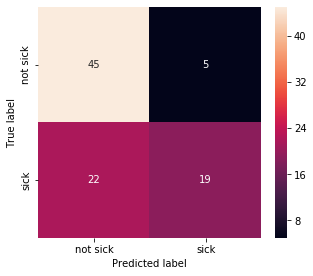

In [20]:
def draw_conf_mat(y_test, y_pred):
    cmat = metrics.confusion_matrix(y_test, y_pred)
    plt.figure(figsize = (5, 4.25))
    ax =sns.heatmap(cmat, annot=True)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ax.set_xticklabels(["not sick", "sick"], ha="center") # 0 = not sick, 1 = sick
    ax.set_yticklabels(["not sick", "sick"], va="center") # 0 = not sick, 1 = sick
    # Fix cut off top/bottom cells:
    bot, top = plt.ylim()
    bot += 0.5
    top -= 0.5
    plt.ylim(bot, top)
    plt.show()
    
def report_scores(y_test, y_pred):
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    fscore = metrics.f1_score(y_test, y_pred)
    print("Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}"
          .format(acc, prec, rec, fscore))
    draw_conf_mat(y_test, y_pred)

y_raw_svm_pred = svm_raw_clf.predict(X_test)
report_scores(y_test, y_raw_svm_pred)

### Question 3.1.3 Discuss what each measure is reporting, why they are different, and why are each of these measures is significant. Explore why we might choose to evaluate the performance of differing models differently based on these factors. Try to give some specific examples of scenarios in which you might value one of these measures over the others.

- Accuracy is the percentage of predictions that were correct. (TP + TN)/(TP + TN + FP + FN)
- Precision is the percentage of positive predictions that were actually positive. TP / (TP + FP)
- Recall is the percentage of positive cases that were correctly predicted as positive. TP / (TP + FN)
- F1 score is the harmonic mean of precision and recall, and is used another measure for accuracy.
- The confusion matrix visualizes the relationship between True/False Positives and Negatives.

As seen from the equations, accuracy reflects the overall classification performance, precision reflects the performance against false positives, while recall reflects that against false negatives. Precision and recall typically are competing metrics - improving one could worsen the other.

The F1 score provides a summary figure to evaluate both precision and recall; the confusion matrix gives a more visual comparison between classification results/errors.

Models for different classification problems might favor optimising different metrics. In general, higher accuracy is desirable. However, when deciding whether to maximise precision vs. recall, one would decide whether false positives or false negatives are more concerning. In our example of heart disease, a false negative could mean the patient does not get the diagnosis/treatment they need; a false positive could be fixed with a second opinion, and at worst, they would get treatment they don't need.

In health applications, false negatives tend to be more serious than false positives. However, in other situations, false positives could be equally or more serious - such as in legal applications. For example, a fraud-detecting classifier with a high false positive rate could lead to innocent people being denied financial services, or worse, legally prosecuted.

### Question 3.1.4 Plot a Receiver Operating Characteristic curve, or ROC curve, and describe what it is and what the results indicate

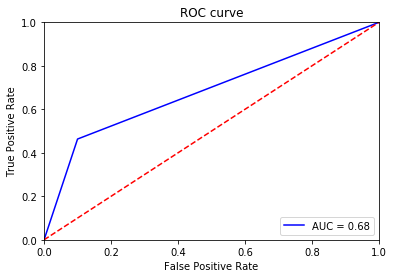

In [21]:
def plot_roc(y_pred, y_test):
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    auc = metrics.auc(fpr, tpr)
    plt.title("ROC curve")
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

plot_roc(y_raw_svm_pred, y_test)

An ROC curve plots the True Positive Rate (TPR) vs. the False Positive Rate (FPR) at different classification thresholds. The distance between the ROC curve and the diagonal (or alternatively, the area under the curve, labeled AUC in the legend) can be thought of as the accuracy of the classifier, or the probability that a random positive example is classified more positively than a random negative example. A curve that equals the diagonal (AUC = 0.5) is useless, since it is no better than randomly classifying samples as positive/negative (50/50); a curve that is maximum height above the diagonal (AUC = 1) is a perfect classifier.

The ROC curve above shows that the accuracy of the raw model is decent, with an AUC of 0.68.

### Question 3.1.5 Rerun, using the exact same settings, only this time use your processed data as inputs. 

In [22]:
svm_proc_clf = SVC(gamma="scale", probability=True)
svm_proc_clf.fit(X_proc_train, y_proc_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

### Question 3.1.6 Report the accuracy, precision, recall, F1 Score, confusion matrix, and plot the ROC Curve of the resulting model.

Accuracy: 0.8571428571428571, Precision: 0.8333333333333334, Recall: 0.8536585365853658, F1 Score: 0.8433734939759037


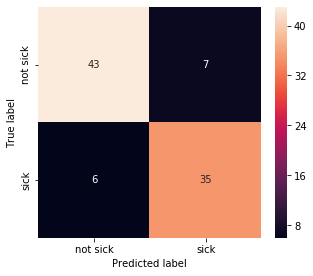

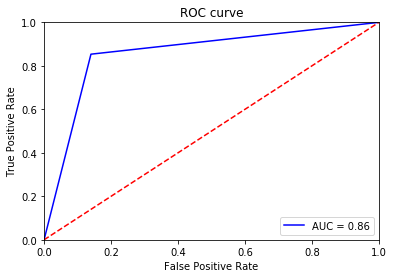

In [23]:
y_proc_svm_pred = svm_proc_clf.predict(X_proc_test)
report_scores(y_proc_test, y_proc_svm_pred)
plot_roc(y_proc_svm_pred, y_proc_test)

### Question 3.1.7 Hopefully you've noticed a dramatic change in performance. Discuss why you think your new data has had such a dramatic impact. 

All the performance metrics have improved significantly. The primary reason I believe is the scaling of the numerical variables, which prevents a feature with higher variance from dominating other features in the dataset. This allows all variables to be considered equally and improves training/classification performance. Also significant (but slightly less so) is the one hot encoding of categorical variables. Without one hot encoding, the numerical value assigned to each category would be taken into account, which is not always correct. Thus one hot encoding will remove any nonexistent ordinal relationships that may confuse the classifier, improving performance.

### Question 3.1.8 Rerun your SVM, but now modify your model parameter kernel to equal 'linear'. Again report your Accuracy, Precision, Recall, F1 scores, and Confusion matrix and plot the new ROC curve.  

Accuracy: 0.8131868131868132, Precision: 0.7727272727272727, Recall: 0.8292682926829268, F1 Score: 0.7999999999999999


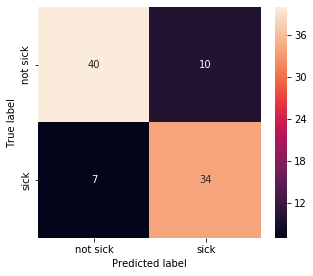

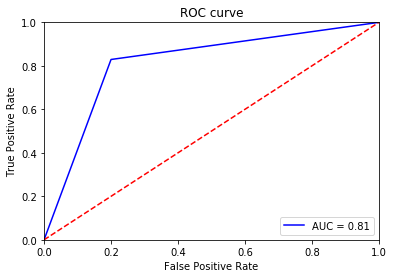

In [24]:
svm_proc_lin_clf = SVC(gamma="scale", probability=True, kernel="linear")
svm_proc_lin_clf.fit(X_proc_train, y_proc_train)
y_proc_lin_svm_pred = svm_proc_lin_clf.predict(X_proc_test)
report_scores(y_proc_test, y_proc_lin_svm_pred)
plot_roc(y_proc_lin_svm_pred, y_proc_test)

### Question 3.1.9 Explain the what the new results you've achieved mean. Read the documentation to understand what you've changed about your model and explain why changing that input parameter might impact the results in the manner you've observed.

The new results are still better than the classifier trained on raw data, but is less performant on all metrics than the model with default settings. This is because the new classifier uses a linear kernel, while the default one uses a Radial Basis Function (RBF) kernel. Linear kernels work well for classifying linearly separable data, but fail otherwise; RBF kernels work on non-linearly separable data, but also linearly separable data as well. In general, RBF is more flexible and accurate, but takes more resources than a linear kernel.

(From my reading, it seems that an RBF kernel will "create non-linear combinations of your features to uplift your samples onto a higher-dimensional feature space where you can use a linear decision boundary to separate your classes". [Source](https://www.kdnuggets.com/2016/06/select-support-vector-machine-kernels.html]))

### Logistic Regression

Knowing that we're dealing with a linearly configured dataset, let's now try another classifier that's well known for handling linear models: Logistic Regression. Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable.

### Question 3.2.1 Implement a Logistical Regression Classifier. Review the [Logistical Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for how to implement the model. For this initial model set the solver = 'sag' and max_iter= 10). Report on the same four metrics as the SVM and graph the resulting ROC curve.

Accuracy: 0.8241758241758241, Precision: 0.7906976744186046, Recall: 0.8292682926829268, F1 Score: 0.8095238095238095


C:\Users\LinusLam\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


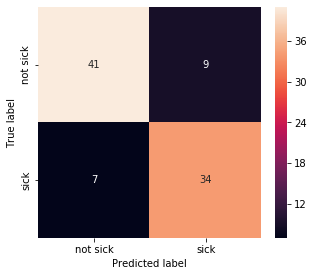

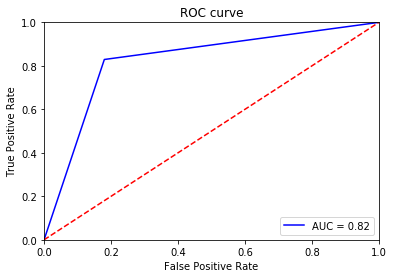

In [25]:
log_clf = LogisticRegression(solver="sag", max_iter=10)
log_clf.fit(X_proc_train, y_proc_train)
y_log_pred = log_clf.predict(X_proc_test)
report_scores(y_proc_test, y_log_pred)
plot_roc(y_log_pred, y_proc_test)

### Question 3.2.2 Did you notice that when you ran the previous model you got the following warning: "ConvergenceWarning: The max_iter was reached which means the coef_ did not converge". Check the documentation and see if you can implement a fix for this problem, and again report your results.

Accuracy: 0.8351648351648352, Precision: 0.8095238095238095, Recall: 0.8292682926829268, F1 Score: 0.8192771084337348


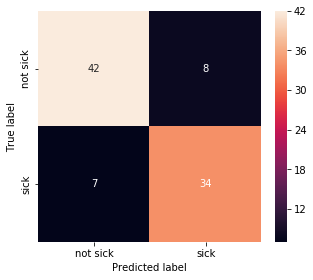

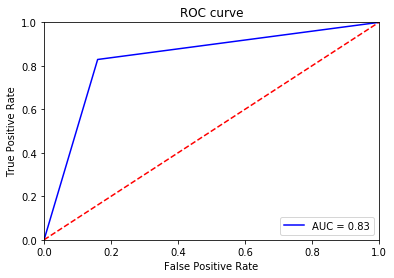

In [26]:
log_conv_clf = LogisticRegression(solver="sag", max_iter=1000)
log_conv_clf.fit(X_proc_train, y_proc_train)
y_log_conv_pred = log_conv_clf.predict(X_proc_test)
report_scores(y_proc_test, y_log_conv_pred)
plot_roc(y_log_conv_pred, y_proc_test)

### Question 3.2.3 Explain what you changed, and why that produced an improved outcome. 

I changed max_iter from 10 to 1000, which is the maximum number of iterations allowed for the solver to converge. 

The results actually seem to be the exact same. However, this is likely due to the model achieving good performance at a quick asymptotic rate, but in a way that doesn't fully converge until after a lot of iterations.

### Question 3.2.4 Rerun your logistic classifier, but modify the penalty = 'none', solver='sag' and again report the results.

Accuracy: 0.8021978021978022, Precision: 0.7674418604651163, Recall: 0.8048780487804879, F1 Score: 0.7857142857142858


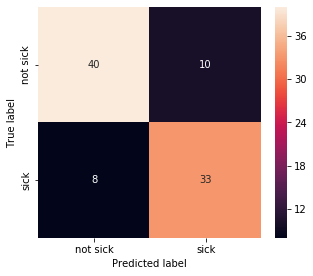

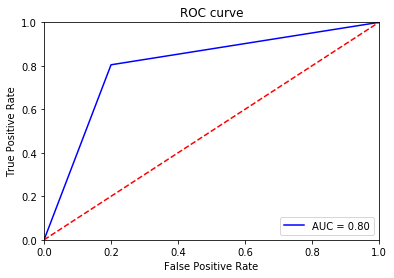

In [27]:
log_npen_clf = LogisticRegression(solver="sag", max_iter=10000, penalty="none")
log_npen_clf.fit(X_proc_train, y_proc_train)
y_log_npen_pred = log_npen_clf.predict(X_proc_test)
report_scores(y_proc_test, y_log_npen_pred)
plot_roc(y_log_npen_pred, y_proc_test)

### Question 3.2.5 Explain what what the penalty parameter is doing in this function, what the solver method is, and why this combination likely produced a more optimal outcome. 

The penalty parameter is used to specify the norm used in the penalization; if penalty="none", no regularization is applied.

"Penalized logistic regression imposes a penalty to the logistic model for having too many variables. This results in shrinking the coefficients of the less contributive variables toward zero. This is also known as regularization." ([Source](http://www.sthda.com/english/articles/36-classification-methods-essentials/149-penalized-logistic-regression-essentials-in-r-ridge-lasso-and-elastic-net/)) By removing the penalty, less contributive variables are left in the classifier, which could interfere or improve classification depending on whether they are predictive of future data. In this case, performance drops slightly by removing the penalty and leaving these variables unregularized.

### Question 3.2.6 Both logistic regression and linear SVM are trying to classify data points using a linear decision boundary, then what’s the difference between their ways to find this boundary?

The linear SVM finds the linear decision boundary directly using the ordinary least squares method, which finds the boundary that minimizes the sum of square residuals. On the other hand, in logistic regression, the sigmoid function is used to map the probability of classification predictions, and returns a continuous probability score between 0 and 1. The linear decision boundary is then found by deciding on a threshold for the probability score, above which the value will be classified as one class, and below which it will be classified as another.

### Clustering Approaches 

Let us now try a different approach to classification using a clustering algorithm. Specifically, we're going to be using K-Nearest Neighbor, one of the most popular clustering approaches. 

### K-Nearest Neighbor  

### Question 3.3.1 Implement a K-Nearest Neighbor algorithm on our data and report the results. For this initial implementation simply use the default settings. Refer to the [KNN Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for details on implementation. Report on the accuracy of the resulting model.

In [28]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_proc_train, y_proc_train)
y_knn_pred = knn_clf.predict(X_proc_test)
knn_acc = metrics.accuracy_score(y_test, y_knn_pred)
print("Accuracy: {}".format(knn_acc))

Accuracy: 0.8241758241758241


### Question 3.3.2 For clustering algorithms, we use different measures to determine the effectiveness of the model. Specifically here, we're interested in the Homogeneity Score, Completeness Score, V-Measure, Adjusted Rand Score, and Adjusted Mutual Information. Calculate each score (hint review the SKlearn Metrics Clustering documentation for how to implement).

In [29]:
def report_clustering_scores(y_test, y_pred):
    hscore = metrics.homogeneity_score(y_test, y_pred)
    cscore = metrics.completeness_score(y_test, y_pred)
    vscore = metrics.v_measure_score(y_test, y_pred)
    rscore = metrics.adjusted_rand_score(y_test, y_pred)
    mscore = metrics.adjusted_mutual_info_score(y_test, y_pred, average_method="arithmetic") # default to suppress warning
    print("Homogeneity: {}, Completeness: {}, V-Measure: {}, \n Adjusted Rand: {} Adjusted Mutual Info: {}"
          .format(hscore, cscore, vscore, rscore, mscore))
    
report_clustering_scores(y_test, y_knn_pred)

Homogeneity: 0.3258940510936594, Completeness: 0.3258940510936594, V-Measure: 0.3258940510936594, 
 Adjusted Rand: 0.41391854016339674 Adjusted Mutual Info: 0.3203745872108416


### Question 3.3.3 Explain what each score means and interpret the results for this particular model. 

- Homogeneity Score
    - Reflects whether a cluster contains samples that belong to a single class. 
      Low values indicate low homogeneity; a score of 1 equals perfect homogeneity.
    - This particular model has low homogeneity.
- Completeness Score
    - Reflects whether all samples with the same true label are elements of the same cluster.
    - This particular model has low completeness.
- V-Measure
    - The harmonic mean of homogeneity and completeness.
    - This particular model has low homogeniety/completeness.
- Adjusted Rand Score
    - The adjusted Rand index is a measure of the simlarity between two data clusterings adjusted for chance.
    - The adjusted rand score for this model is low.
- Adjusted Mutual Information
    - The adjusted mutual information score is a measure of the a measure of the similarity between two labels of the same data, adjusted for chance.
    - The adjust mutual information score for this model is low.

As we're beginning to see, the input parameters for your model can dramatically impact the performance of the model. How do you know which settings to choose? Studying the models and studying your datasets are critical as they can help you anticipate which models and settings are likely to produce optimal results. However sometimes that isn't enough, and a brute force method is necessary to determine which parameters to use. For this next question we'll attempt to optimize a parameter using a brute force approach. 

### Question 3.3.4 Parameter Optimization.  The KNN Algorithm includes an n_neighbors attribute that specifies how many neighbors to use when developing the cluster. (The default value is 5, which is what your previous model used.) Lets now try n values of: 1, 2, 3, 5, 10, 20, 50, and 100. Run your model for each value and report the 6 measures (5 clustering specific plus accuracy) for each. Report on which n value produces the best accuracy and V-Measure. (HINT leverage python's ability to loop to run through the array and generate results without needing to manually code each iteration).

In [30]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_proc_train, y_proc_train)
y_knn_pred = knn_clf.predict(X_proc_test)
knn_acc = metrics.accuracy_score(y_test, y_knn_pred)

neighbors = [1, 2, 3, 5, 10, 20, 50, 100]

for (i, n) in enumerate(neighbors):
    knn_i_clf = KNeighborsClassifier(n_neighbors=n)
    knn_i_clf.fit(X_proc_train, y_proc_train)
    y_knn_i_pred = knn_i_clf.predict(X_proc_test)
    knn_i_acc = metrics.accuracy_score(y_test, y_knn_i_pred)
    print("KNN Classifier #{} (N = {} Neighbors): \nAccuracy: {}".format(i+1, n, knn_i_acc))
    report_clustering_scores(y_test, y_knn_i_pred)
    print("")

KNN Classifier #1 (N = 1 Neighbors): 
Accuracy: 0.7802197802197802
Homogeneity: 0.24398180883616719, Completeness: 0.2422786074815696, V-Measure: 0.2431272252974664, 
 Adjusted Rand: 0.30646200085873765 Adjusted Mutual Info: 0.23695340520839933

KNN Classifier #2 (N = 2 Neighbors): 
Accuracy: 0.7802197802197802
Homogeneity: 0.2426065720941319, Completeness: 0.26029762829999, V-Measure: 0.25114093410475796, 
 Adjusted Rand: 0.3065488435325474 Adjusted Mutual Info: 0.24477608667873169

KNN Classifier #3 (N = 3 Neighbors): 
Accuracy: 0.8021978021978022
Homogeneity: 0.28718664665485977, Completeness: 0.28518183864094204, V-Measure: 0.28618073157481083, 
 Adjusted Rand: 0.3582331472735079 Adjusted Mutual Info: 0.28035809944076606

KNN Classifier #4 (N = 5 Neighbors): 
Accuracy: 0.8241758241758241
Homogeneity: 0.3258940510936594, Completeness: 0.3258940510936594, V-Measure: 0.3258940510936594, 
 Adjusted Rand: 0.41391854016339674 Adjusted Mutual Info: 0.3203745872108416

KNN Classifier #5 (N

The best accuracy and V-Measure is 0.8681318681318682 and 0.4495317144844716, respectively, given by Classifier #8 using N=100 neighbors.

### Question 3.3.5 When are clustering algorithms most effective, and what do you think  explains the comparative results we achieved?  

Clustering algorithms work the best when values for different classes are close in value/proximity. In particular, it works best when dimensionality is not high, and there are not many irrelevant attributes.

The reason for the improving performance with higher values of N is because higher values of N reduces the effect of noise in the classification. Having low values of N also makes the cluster granularity too fine and leads to overfitting, reducing performance. This is significant since, as seen in the heatmap in section 1.9, there are no variables that are strong individual predictors of heart disease; increasing N thus increases performance significantly in this case.